In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from thesis_tools.utils.data import *
from thesis_tools.models.frequentist import *
from thesis_tools.models.bayesian_univariate_time_series import *

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [3]:
df = read_panel_data()
df = df[df['group'] == 'U.S.']

In [4]:
df

,group,year,gdp_pc,CAC40,DAX,FTSE100,MOEX,MSCI,NIFTY,OMX40,...,log_change_CAC40,log_change_DAX,log_change_FTSE100,log_change_MOEX,log_change_MSCI,log_change_NIFTY,log_change_OMX40,log_change_SPX,log_change_SSE,constant
325,U.S.,2001,37133.623113,5998.490234,6795.140137,6297.53,NaN,1249.099976,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
326,U.S.,2002,37997.759657,4461.870117,5107.609863,5164.78,NaN,968.500000,NaN,NaN,...,-0.295940,-0.285476,-0.198295,NaN,-0.254430,NaN,NaN,-0.189500,-0.325531,1
327,U.S.,2003,39490.274956,2937.879883,2747.830078,3567.41,NaN,768.299988,NaN,NaN,...,-0.417880,-0.619920,-0.370023,NaN,-0.231568,NaN,NaN,-0.278230,0.005449,1
328,U.S.,2004,41724.631629,3638.439941,4058.600098,4390.68,NaN,1053.699951,NaN,NaN,...,0.213867,0.390027,0.207644,NaN,0.315883,NaN,NaN,0.279053,0.058851,1
329,U.S.,2005,44123.407068,3913.689941,4254.850098,4852.31,NaN,1155.599976,NaN,NaN,...,0.072926,0.047221,0.099971,NaN,0.092312,NaN,NaN,0.043373,-0.288708,1
330,U.S.,2006,46302.000880,4947.990234,5674.149902,5760.26,NaN,1297.300049,NaN,NaN,...,0.234501,0.287861,0.171528,NaN,0.115666,NaN,NaN,0.080332,0.054076,1
331,U.S.,2007,48050.223777,5608.310059,6789.109863,6203.09,NaN,1515.400024,NaN,NaN,...,0.125268,0.179399,0.074065,NaN,0.155394,NaN,NaN,0.116498,0.795167,1
332,U.S.,2008,48570.045980,4869.790039,6851.750000,5879.78,NaN,1486.400024,5137.450195,NaN,...,-0.141199,0.009184,-0.053528,NaN,-0.019322,NaN,NaN,-0.042388,0.453096,1
333,U.S.,2009,47194.943355,2973.919922,4338.350098,4149.64,NaN,838.799988,2874.800049,NaN,...,-0.493170,-0.457010,-0.348498,NaN,-0.572140,-0.580574,NaN,-0.512338,-0.789358,1
334,U.S.,2010,48650.643128,3739.459961,5608.790039,5188.52,NaN,1119.500000,4882.049805,NaN,...,0.229060,0.256841,0.223427,NaN,0.288665,0.529582,NaN,0.262575,0.406572,1


In [5]:
mean_SPX_return = df['log_change_SPX'].mean()
mean_gdp_growth = df['log_change_gdp_pc'].mean()
n_billionaires = df['N_net_worth']

In [6]:
average_number_of_new_billionaires = np.mean(n_billionaires - n_billionaires.shift(1))
billionaires_2023 = 735
expected_billionaires_2034 = int(billionaires_2023 + 11 * average_number_of_new_billionaires)

In [7]:
mean_SPX_return, mean_gdp_growth, expected_billionaires_2034, average_number_of_new_billionaires

(0.0569348982546462, 0.0343113204990736, 1024, 26.333333333333332)

In [8]:
# add rows to the dataframe until 2034 assuming the mean growth rates
rows_to_add = {}
for i in range(2023, 2035):
    rows_to_add[i] = {'group':'U.S.', 'year': i, 'constant':1, 'log_change_SPX': mean_SPX_return, 'log_change_gdp_pc': mean_gdp_growth, 'group': 'U.S.'}
rows_to_add_df = pd.DataFrame(rows_to_add).T
df = pd.concat([df, rows_to_add_df], axis=0)
# make the constant, log_change_SPX and log_change_gdp_pc columns numeric
df['constant'] = pd.to_numeric(df['constant'])
df['log_change_SPX'] = pd.to_numeric(df['log_change_SPX'])
df['log_change_gdp_pc'] = pd.to_numeric(df['log_change_gdp_pc'])

In [9]:
df

,group,year,gdp_pc,CAC40,DAX,FTSE100,MOEX,MSCI,NIFTY,OMX40,...,log_change_CAC40,log_change_DAX,log_change_FTSE100,log_change_MOEX,log_change_MSCI,log_change_NIFTY,log_change_OMX40,log_change_SPX,log_change_SSE,constant
325,U.S.,2001,37133.623113,5998.490234,6795.140137,6297.53,NaN,1249.099976,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
326,U.S.,2002,37997.759657,4461.870117,5107.609863,5164.78,NaN,968.500000,NaN,NaN,...,-0.295940,-0.285476,-0.198295,NaN,-0.254430,NaN,NaN,-0.189500,-0.325531,1
327,U.S.,2003,39490.274956,2937.879883,2747.830078,3567.41,NaN,768.299988,NaN,NaN,...,-0.417880,-0.619920,-0.370023,NaN,-0.231568,NaN,NaN,-0.278230,0.005449,1
328,U.S.,2004,41724.631629,3638.439941,4058.600098,4390.68,NaN,1053.699951,NaN,NaN,...,0.213867,0.390027,0.207644,NaN,0.315883,NaN,NaN,0.279053,0.058851,1
329,U.S.,2005,44123.407068,3913.689941,4254.850098,4852.31,NaN,1155.599976,NaN,NaN,...,0.072926,0.047221,0.099971,NaN,0.092312,NaN,NaN,0.043373,-0.288708,1
330,U.S.,2006,46302.000880,4947.990234,5674.149902,5760.26,NaN,1297.300049,NaN,NaN,...,0.234501,0.287861,0.171528,NaN,0.115666,NaN,NaN,0.080332,0.054076,1
331,U.S.,2007,48050.223777,5608.310059,6789.109863,6203.09,NaN,1515.400024,NaN,NaN,...,0.125268,0.179399,0.074065,NaN,0.155394,NaN,NaN,0.116498,0.795167,1
332,U.S.,2008,48570.045980,4869.790039,6851.750000,5879.78,NaN,1486.400024,5137.450195,NaN,...,-0.141199,0.009184,-0.053528,NaN,-0.019322,NaN,NaN,-0.042388,0.453096,1
333,U.S.,2009,47194.943355,2973.919922,4338.350098,4149.64,NaN,838.799988,2874.800049,NaN,...,-0.493170,-0.457010,-0.348498,NaN,-0.572140,-0.580574,NaN,-0.512338,-0.789358,1
334,U.S.,2010,48650.643128,3739.459961,5608.790039,5188.52,NaN,1119.500000,4882.049805,NaN,...,0.229060,0.256841,0.223427,NaN,0.288665,0.529582,NaN,0.262575,0.406572,1


In [10]:
model = Univariate_GeneralisedPareto_TimeSeries(
    panel_df=df,
    train_until=2022,
    X_columns=['constant', 'log_change_SPX', 'log_change_gdp_pc']
)

Panel is too long, truncating to 15 years


In [11]:
model.fit()

In [12]:
pred = model.predict()

In [30]:
dist_2034 = pred['y_2034']
log_dist_2034 = np.log(dist_2034)

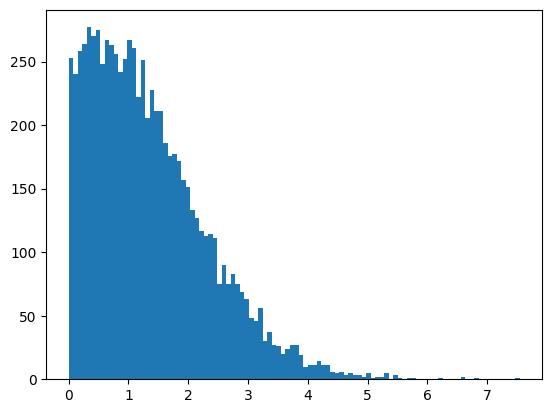

In [31]:
plt.hist(log_dist_2034, bins=100)
plt.show()

In [36]:
# fit a gpd to the data
gpd = GeneralisedPareto()
gpd.fit(data=dist_2034)

(0.6525680855275313, 2.5394329781476714, 1.0)

In [44]:
n_sims = 10000
has_trillionaire = []
for _ in range(n_sims):
    synthetic_data = gpd.sample(expected_billionaires_2034)
    has_trillionaire.append(np.any(synthetic_data >= 1000))

In [45]:
np.mean(has_trillionaire)

0.1876